In [103]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [104]:
file_path = '/content/drive/MyDrive/employee_burnout_analysis.xlsx'
df = pd.read_excel(file_path)

In [105]:
# Initial exploration
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [106]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


In [107]:
# Handle missing values
df = df.dropna()
print("\nShape after dropping missing values:", df.shape)


Shape after dropping missing values: (18590, 9)


In [108]:
# Drop irrelevant columns
df = df.drop(['Employee ID', 'Date of Joining'], axis=1)

In [109]:
# Encode categorical columns
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['WFH Setup Available'] = label_encoder.fit_transform(df['WFH Setup Available'])
df['Company Type'] = label_encoder.fit_transform(df['Company Type'])

In [110]:
# Check correlation to find impactful features
correlation = df.corr()
print("\nCorrelation with Burn Rate:")
print(correlation['Burn Rate'].sort_values(ascending=False))


Correlation with Burn Rate:
Burn Rate               1.000000
Mental Fatigue Score    0.944389
Resource Allocation     0.855005
Designation             0.736412
Gender                  0.156577
Company Type            0.005904
WFH Setup Available    -0.307168
Name: Burn Rate, dtype: float64


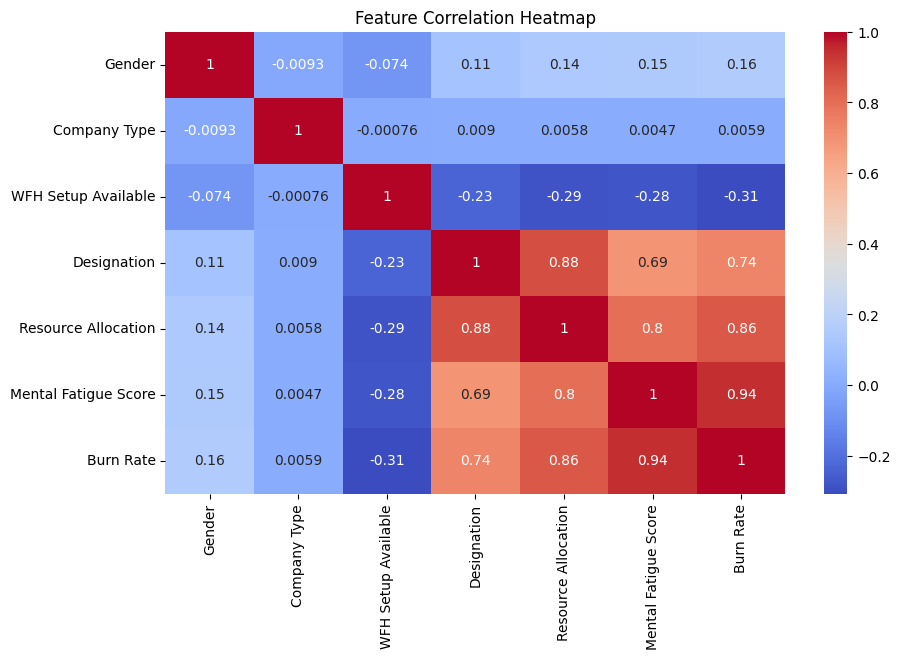

In [111]:
# Plot heatmap of correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [112]:
# Prepare data for training
X = df.drop('Burn Rate', axis=1)
y = df['Burn Rate']

In [113]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [114]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
# Make predictions
y_pred = model.predict(X_test)

In [117]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [118]:
print("\nModel Performance:")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


Model Performance:
RMSE: 0.055352126446872936
R2 Score: 0.9202219777928837


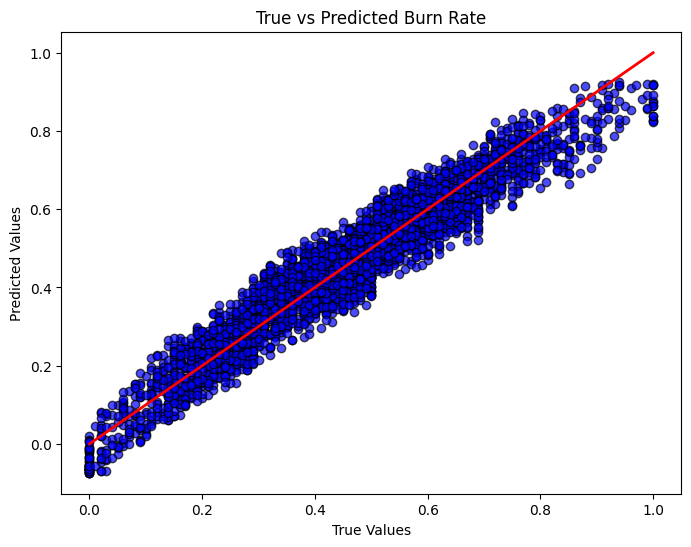

In [119]:
# Plotting true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("True vs Predicted Burn Rate")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

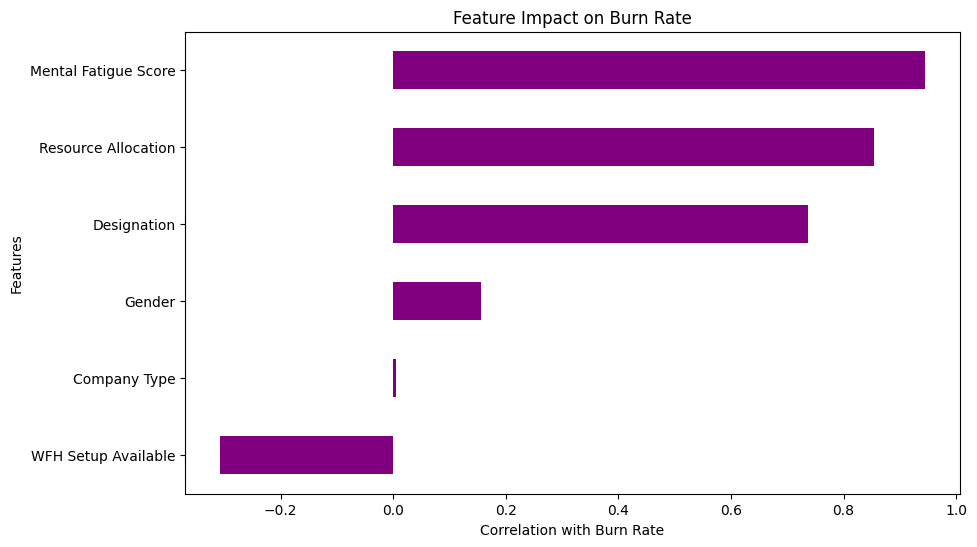

In [120]:
# Bar chart for feature importance (correlation with Burn Rate)
plt.figure(figsize=(10, 6))
correlation['Burn Rate'][:-1].sort_values(ascending=True).plot(kind='barh', color='purple')
plt.title("Feature Impact on Burn Rate")
plt.xlabel("Correlation with Burn Rate")
plt.ylabel("Features")
plt.show()

In [122]:
# Happy Coding! 😊